# Financial Risk Assessment Using Integration

## Introduction

In finance, risk assessment is crucial for managing portfolios and understanding the potential for losses. One of the most common metrics used in this context is Value at Risk (VaR), which quantifies the maximum expected loss over a specific time period with a given confidence level.

In this notebook, we'll explore how to use integration to calculate the probability of different financial outcomes, focusing on the probability of daily returns falling below a certain threshold.

## The Probability Model: Normal Distribution

In financial risk management, the normal distribution is frequently used to model the returns of assets. This model is chosen for its simplicity and the central limit theorem, which suggests that the sum of many small, independent factors often leads to a normal distribution.

### Key Parameters:
- **Mean ($ \mu $)**: The average expected return.
- **Standard Deviation ($ \sigma $)**: A measure of the volatility or risk of the returns.

Assuming daily returns follow a normal distribution, we can model the likelihood of returns falling within certain ranges, which is critical for risk assessment.

## Defining Value at Risk (VaR)

Value at Risk (VaR) is a statistical technique used to measure the risk of loss on a portfolio. It estimates the maximum expected loss over a specified time period with a given confidence level.

### Interpretation of VaR:
For example, if a portfolio has a one-day 99% VaR of 1 million, this means that there is a 1\% chance that the portfolio will lose more than 1 million in a single day.

In mathematical terms, VaR at a confidence level $\alpha $ is the value $ q$ such that:
$$
P(X < q) = 1-\alpha
$$


### Real Financial Data: S&P 500

We start by fetching historical data for the S&P 500 index, a commonly used benchmark for the performance of U.S. stocks. The plot below shows the adjusted closing prices from January 2020 to January 2023.


[*********************100%***********************]  1 of 1 completed


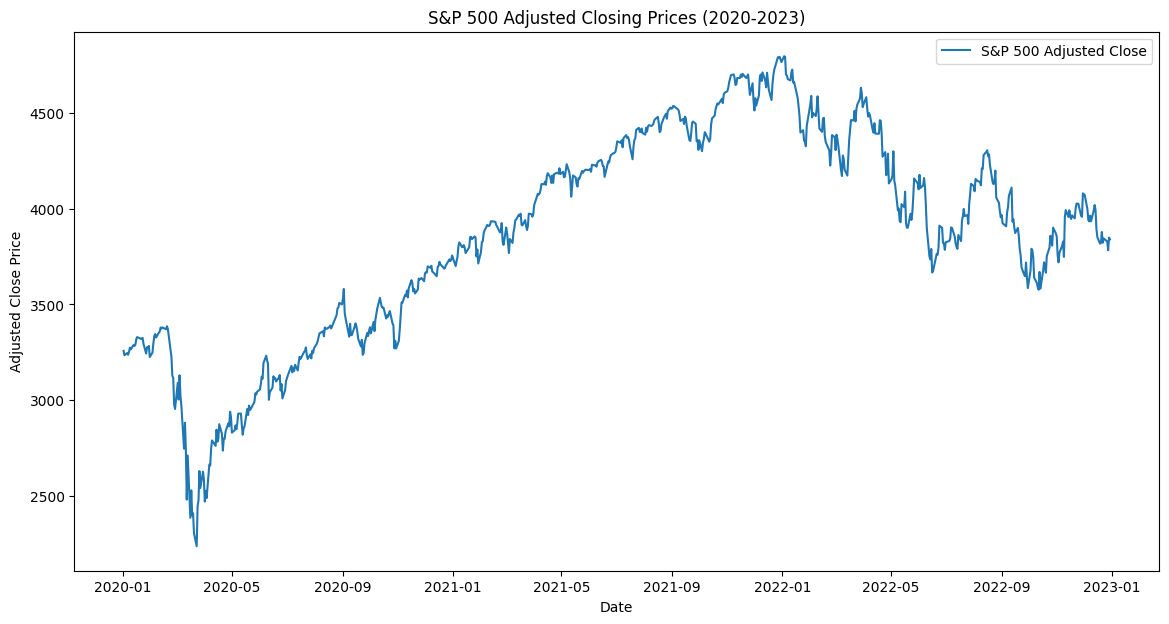

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Download historical data for S&P 500 (or another index)
symbol = "^GSPC"  # S&P 500 index symbol
data = yf.download(symbol, start="2020-01-01", end="2023-01-01")

# Plot the adjusted closing price
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='S&P 500 Adjusted Close')
plt.title('S&P 500 Adjusted Closing Prices (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


### Calculating Daily Returns

Daily returns represent the percentage change in the adjusted closing price from one day to the next. The plot below shows the daily returns of the S&P 500 over the same period.


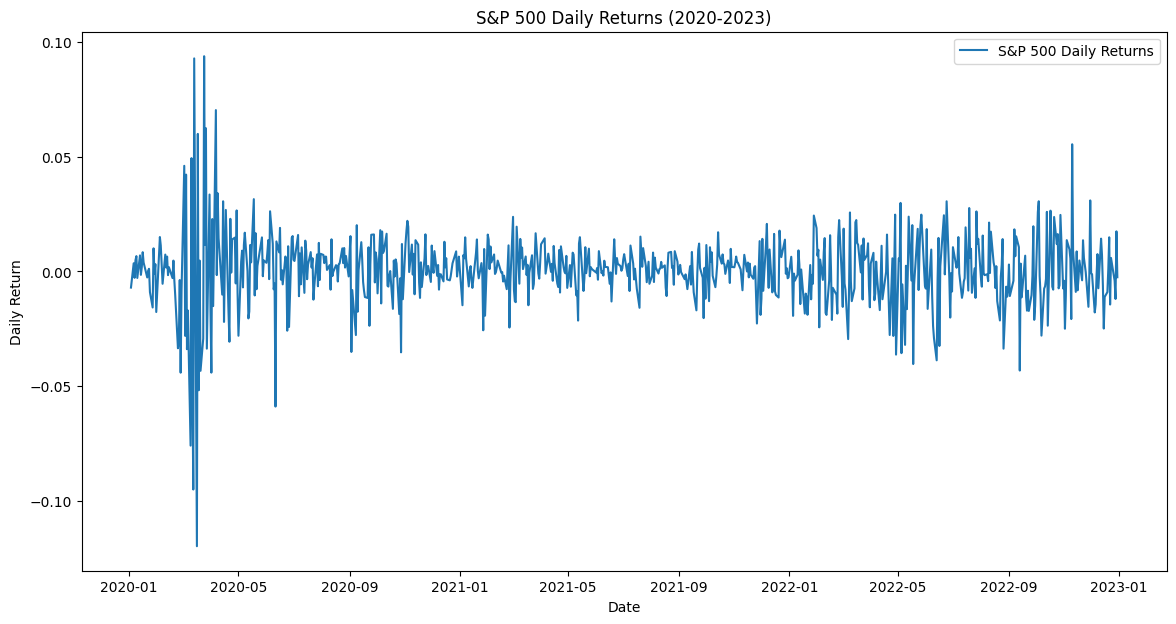

In [ ]:
# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(14, 7))
plt.plot(data['Daily Return'], label='S&P 500 Daily Returns')
plt.title('S&P 500 Daily Returns (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


In [ ]:
# Calculate the mean and standard deviation of daily returns
mu_returns = data['Daily Return'].mean()
sigma_returns = data['Daily Return'].std()

# Display the results
print(f"Mean Daily Return: {mu_returns:.6f}")
print(f"Standard Deviation of Daily Returns: {sigma_returns:.6f}")


Mean Daily Return: 0.000347
Standard Deviation of Daily Returns: 0.016041


## Computing the VAR

For the Normal distribution the VAR can actually be derived:

$$
\text{VaR} = \mu + \sigma \times \Phi^{-1}(1 - \alpha)
$$

where $ \Phi^{-1} $ is the inverse of the cumulative distribution function (CDF) of the normal distribution. Let's compute it given the data we have.

In [ ]:
from scipy.stats import norm

# Define the confidence level
confidence_level = 0.99  # 99% confidence level

# Calculate the VaR using the formula
VaR = mu_returns + sigma_returns * norm.ppf(1 - confidence_level)

# Display the VaR result
print(f"The Value at Risk (VaR) at the {confidence_level*100}% confidence level is {VaR:.6f}")


The Value at Risk (VaR) at the 99.0% confidence level is -0.036970


This means there is a 1% chance that the portfolio could lose more than 3.697% in a day.

## Understanding $ \Phi^{-1} $ as an Integral

The inverse cumulative distribution function $ \Phi^{-1} $ that we used to compute VaR is fundamentally related to integration.

### What is $ \Phi(x) $?

$ \Phi(x)$ is the cumulative distribution function (CDF) of the normal distribution, which gives the probability that a normally distributed random variable is less than or equal to $ x $. Mathematically, it is defined as:

$$
\Phi(x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}} e^{-\frac{t^2}{2}} dt
$$

### What is $ \Phi^{-1}(\alpha) $?

The inverse CDF, $ \Phi^{-1}(\alpha) $, gives the value of $ x$ such that the area under the curve to the left of $ x $ equals $\alpha $. This is essentially solving for $x$ in the equation:

$$
\alpha = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}} e^{-\frac{t^2}{2}} dt
$$

This integral represents the area under the probability density function (PDF) up to the point $ x $, and $ \Phi^{-1}(\alpha) $ gives us the $  x $-value for a specified probability $ \alpha $.

### Visualizing the Integral

Next, we'll visualize this concept using a histogram of our actual returns, overlayed with the assumed normal distribution and the area corresponding to the VaR calculation.




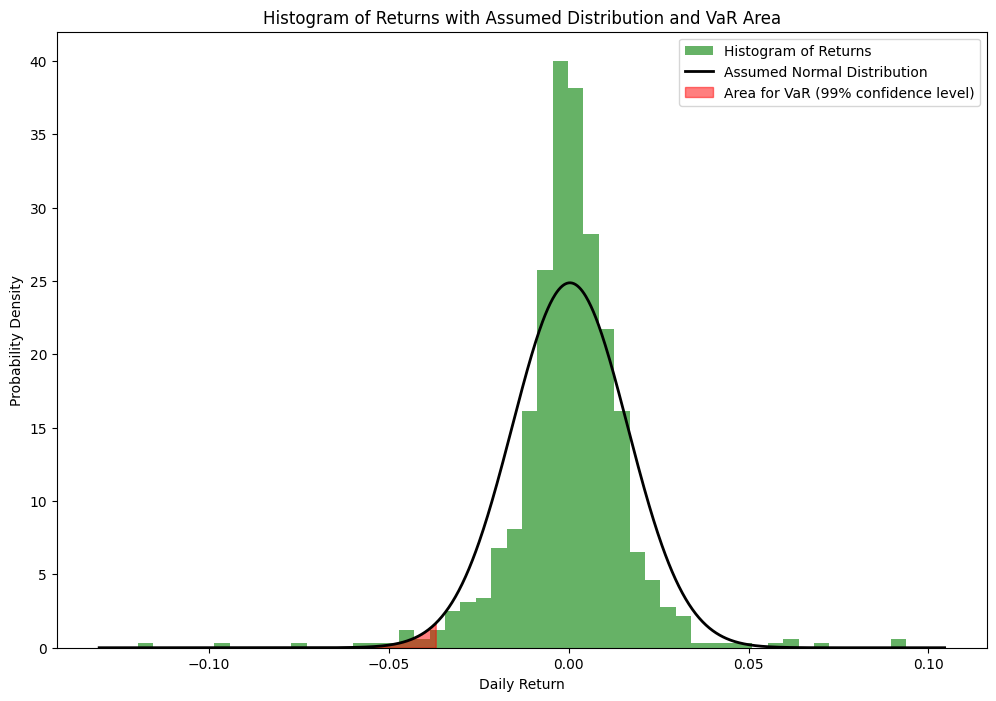

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate the histogram of the daily returns
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(data['Daily Return'].dropna(), bins=50, density=True, alpha=0.6, color='g', label='Histogram of Returns')

# Plot the assumed normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu_returns, sigma_returns)
plt.plot(x, p, 'k', linewidth=2, label='Assumed Normal Distribution')

# Calculate the VaR again for 99% confidence
VaR = mu_returns + sigma_returns * norm.ppf(1 - 0.99)

# Shade the area under the curve to the left of the VaR
x_fill = np.linspace(xmin, VaR, 1000)
p_fill = norm.pdf(x_fill, mu_returns, sigma_returns)
plt.fill_between(x_fill, 0, p_fill, color='r', alpha=0.5, label=f'Area for VaR (99% confidence level)')

# Adding labels and legend
plt.title('Histogram of Returns with Assumed Distribution and VaR Area')
plt.xlabel('Daily Return')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


## Using numerical integration
The code below computes again the VAR using the built-in function for the Normal distribution.

But what we also do is computing the integral using numerical approximation methods (Riemaniann sums). We can see that the results match closely!!

In [ ]:
# Compute the VaR using the inverse CDF (Phi^{-1})
VaR_phi_inv = mu_returns + sigma_returns * norm.ppf(1 - 0.99)

print(f"Value at Risk (VaR) using inverse CDF (Phi^-1) at 99% confidence level: {VaR_phi_inv:.6f}")


from scipy.integrate import quad

# Define the PDF of the normal distribution
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Function to compute the cumulative probability up to a given point using numerical integration
def cumulative_probability(x, mu, sigma):
    result, _ = quad(normal_pdf, -np.inf, x, args=(mu, sigma))
    return result

# Find the VaR by iterating to find the point where cumulative probability equals 1 - alpha
def find_var_numerical(mu, sigma, alpha):
    target_prob = 1 - alpha
    x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    for x in x_values:
        if cumulative_probability(x, mu, sigma) >= target_prob:
            return x
    return None

# Compute the VaR using numerical integration
VaR_numerical = find_var_numerical(mu_returns, sigma_returns, 0.99)

print(f"Value at Risk (VaR) using numerical integration at 99% confidence level: {VaR_numerical:.6f}")


Value at Risk (VaR) using inverse CDF (Phi^-1) at 99% confidence level: -0.036970
Value at Risk (VaR) using numerical integration at 99% confidence level: -0.036969
